# 6. Kenel Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import kernels
import regressions

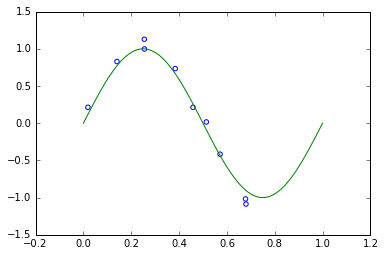

In [2]:
def create_toy_data(func, low=0, high=1., n=10, std=1.):
    x = np.random.uniform(low, high, n)
    t = func(x) + np.random.normal(scale=std, size=n)
    return x, t

def func(x):
        return np.sin(2 * np.pi * x)

x, t = create_toy_data(func, high=0.7, std=0.1)
x_test = np.linspace(0, 1, 100)

plt.scatter(x, t, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x_test, func(x_test), color="g", label="sin$(2\pi x)$")

In [9]:
gpr = regressions.GaussianProcessRegression(kernel=kernels.RBF(np.array([1., 1.])), beta=100)
gpr.fit_kernel(x[:, None], t)

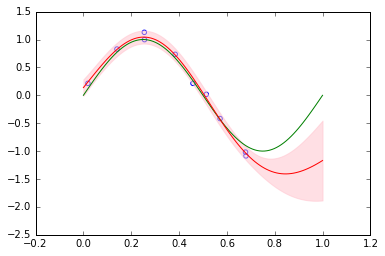

In [11]:
y, y_std = gpr.predict_dist(x_test[:, None])
plt.scatter(x, t, facecolor="none", edgecolor="b", color="blue", label="training")
plt.plot(x_test, func(x_test), color="g", label="sin$(2\pi x)$")
plt.plot(x_test, y, color="r", label="gpr")
plt.fill_between(x_test, y - y_std, y + y_std, alpha=0.5, color="pink", label="std")

In [12]:
gpr.kernel.params

array([  1.32096202,  10.4606155 ])